In [94]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
import json

with open("smog.json", 'r', encoding = "utf8") as json_data:
    data = json.load(json_data)

data = pd.json_normalize(data)

cleaned = data['smog_data'].values[0]

df = pd.json_normalize(cleaned)

names = ["Timestamp", 'Name', 'Street', 'Post Code', 'City', "Longitude", "Latitude", "Humidity Avg", "Pressure Avg", "Temperature Avg", "PM10 Avg", "PM25 Avg"]

df.columns = names

for col in ['Name', 'Street', 'City']:
    df[col] = df[col].str.title()

df.replace({None: np.nan}, inplace = True)
df.replace({'Name' : {'Iii' : 'III', 'Ii' : 'II', 'Ul' : 'ul', 'Im' : 'im', r' W ' : ' w ', ' We ' : ' we ',
                      'Nr' : 'nr'}, 
            'Street' : {'Iii' : 'III', 'Ii' : 'II', 'Ul' : 'ul', 'Im' : 'im', r' W ' : ' w ', ' We ' : ' we ',
                      'Nr' : 'nr'}}, 
           inplace = True, regex = True)


ix = pd.DatetimeIndex(df['Timestamp'])

df = df.iloc[:, 1:]
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df.index = ix

df.head(10)

,Name,Street,Post Code,City,Longitude,Latitude,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
Timestamp,,,,,,,,,,,
2025-04-28 11:21:09,Szkoła Podstawowa im. Mariana Falskiego w Kras...,ul. Szkolna,63-522,Kraszewice,18.224030,51.515630,95.120000,1015.110000,8.610000,32.860000,20.200000
2025-04-28 11:21:09,Szkoła Podstawowa we Wrząsowicach,ul. Szkolna,32-040,Wrząsowice,19.942820,49.961030,34.200000,988.925000,18.775000,6.175000,5.525000
2025-04-28 11:21:09,Publiczna Szkoła Podstawowa nr 2 im. Kazimierz...,ul. Wawrzyńca Świerzego,47-100,Strzelce Opolskie,18.314889,50.503431,60.000000,1043.166667,12.266667,1.000000,0.490000
2025-04-28 11:21:09,Zespół Szkół nr 1 w Pszczynie,ul. Kazimierza Wielkiego,43-200,Pszczyna,18.945706,49.965883,79.666667,1005.566667,11.166667,10.800000,6.586667
2025-04-28 11:21:09,Zespół Szkół im. Powstańców Wielkopolskich w J...,Szkolna,63-421,Janków Przygodzki,17.788907,51.596172,57.166667,1012.300000,14.400000,15.700000,8.893333
2025-04-28 11:21:09,Szkoła Podstawowa nr 7 im. Żołnierzy Września ...,ul. Męczenników Oświęcimskich,43-229,Ćwiklice,18.989839,49.971937,37.233333,996.366667,23.666667,8.066667,4.590000
2025-04-28 11:21:09,Szkoła Podstawowa nr 12 w Studzionce,ul. Jordana,43-245,Studzionka,18.774985,49.960356,99.333333,1004.266667,11.500000,14.800000,8.833333
2025-04-28 11:21:09,Zespół Szkolno-Przedszkolny w Piasku,Szkolna,43-211,Piasek,18.946340,50.009550,53.533333,1005.700000,11.700000,11.600000,7.260000
2025-04-28 11:21:09,Zespół Szkolno-Przedszkolny w Łące,Fitelberga,43-241,Łąka,18.906757,49.958244,51.166667,1003.033333,12.666667,14.066667,8.236667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1727 entries, 2025-04-28 11:21:09 to 2025-04-28 11:21:09
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1727 non-null   object 
 1   Street           1411 non-null   object 
 2   Post Code        1727 non-null   object 
 3   City             1727 non-null   object 
 4   Longitude        1727 non-null   float64
 5   Latitude         1727 non-null   float64
 6   Humidity Avg     1725 non-null   float64
 7   Pressure Avg     1725 non-null   float64
 8   Temperature Avg  1725 non-null   float64
 9   PM10 Avg         1727 non-null   float64
 10  PM25 Avg         1727 non-null   float64
dtypes: float64(7), object(4)
memory usage: 161.9+ KB


In [143]:
df[df['Street'].isnull()].head()

,Name,Street,Post Code,City,Longitude,Latitude,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
Timestamp,,,,,,,,,,,
2025-04-28 11:21:09,Zespół Szkół w Piotrowie,NaN,62-814,Piotrów,18.054850,51.815700,27.633333,1013.666667,23.433333,7.200000,4.070000
2025-04-28 11:21:09,Szkoła Podstawowa w Czarnymlesie,NaN,63-421,Czarnylas,17.762604,51.508366,73.800000,1008.866667,13.466667,16.200000,9.376667
2025-04-28 11:21:09,Szkoła Podstawowa im. Bohaterów Powstań Śląski...,NaN,48-364,Kałków,17.185241,50.404200,96.340000,1010.980000,8.550000,31.050000,18.640000
2025-04-28 11:21:09,Szkoła Podstawowa w Maciejowicach,NaN,48-385,Maciejowice,17.134970,50.499800,38.433333,991.800000,21.433333,4.466667,2.390000
2025-04-28 11:21:09,Szkoła Podstawowa w Szkodnej,NaN,39-126,Szkodna,21.647559,49.984184,39.955556,989.711111,12.766667,3.266667,3.255556


In [4]:
#ilość wartości NA
df.isnull().mean() * 100

Name                0.000000
Street             18.297626
Post Code           0.000000
City                0.000000
Longitude           0.000000
Latitude            0.000000
Humidity Avg        0.115808
Pressure Avg        0.115808
Temperature Avg     0.115808
PM10 Avg            0.000000
PM25 Avg            0.000000
dtype: float64

Zbiór charakteryzuje się bardzo małą ilością wartości brakujących. Najwięcej (ok. 18%) znajduje się w zmiennej ulica.

In [5]:
df[df['Street'].isnull()]['City'].unique()

array(['Piotrów', 'Czarnylas', 'Kałków', 'Maciejowice', 'Szkodna',
       'Jawidz', 'Kłodnica Dolna', 'Mariańskie Porzecze', 'Glina',
       'Ołdaki', 'Polnica', 'Łubno', 'Moszczanka', 'Dziepółć', 'Bogucice',
       'Niedzieliska', 'Klementowice', 'Borzechów-Kolonia', 'Amelin',
       'Podwilk', 'Lipiny', 'Garczegorze', 'Gawłów', 'Nieczajna Górna',
       'Pawęzów', 'Rajbrot', 'Jaworze Górne', 'Nowe Łubki', 'Roztoka',
       'Stobiecko Szlacheckie', 'Ustków', 'Męcina', 'Przyszowa',
       'Stanisławice', 'Studzieniec', 'Sypitki', 'Racławice', 'Zbiczno',
       'Długowola Pierwsza', 'Głosków', 'Stary Kębłów', 'Obrazów',
       'Borzymin', 'Bysina', 'Bęczarka', 'Droginia', 'Głogoczów',
       'Raciechowice', 'Spytkowice', 'Mników', 'Korzecko', 'Jeleniów',
       'Myśliszewice', 'Brzeście', 'Bierzwnica', 'Bieniowice',
       'Grodziszcze', 'Łaszewo', 'Kobylanka', 'Korczyna', 'Radziki Duże',
       'Sierosławice', 'Kleczanów', 'Łękawica', 'Starochęciny',
       'Jadamwola', 'Łukowa', 'Wola

Można zauważyć, że wartości NA dla zmiennej Street występują dla małych miejscowości, a więc takich, gdzie często nie ma ulic (co można sprawdzić np. na mapach Google dla wybranych miejscowości).
Po dalszym badaniu okazuje się jednak, że w innych miejscach jako ulica jest wpisana nazwa miejscowości: 

In [144]:
df[df['Street'] == df['City']].head()

,Name,Street,Post Code,City,Longitude,Latitude,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
Timestamp,,,,,,,,,,,
2025-04-28 11:21:09,Szkoła Podstawowa im. Arkadego Fiedlera w Rasz...,Pogrzybów,63-440,Pogrzybów,17.723099,51.713966,48.70,1018.200000,22.900000,6.000000,3.500000
2025-04-28 11:21:09,Szkoła Podstawowa im. Orła Białego w Sokołowicach,Sokołowice,56-400,Sokołowice,17.446900,51.245000,77.98,1009.180000,9.680000,10.980000,6.150000
2025-04-28 11:21:09,Szkoła Podstawowa w Ligocie Polskiej,Ligota Polska,56-400,Ligota Polska,17.542356,51.239942,99.90,1005.966667,15.833333,9.000000,4.830000
2025-04-28 11:21:09,Szkoła Podstawowa im. Unicef w Ligocie Małej,Ligota Mała,56-400,Ligota Mała,17.365476,51.142467,52.70,984.200000,11.600000,15.766667,8.633333
2025-04-28 11:21:09,Szkoła Podstawowa we Wszechświętem,Wszechświęte,56-400,Wszechświęte,17.484968,51.191751,99.90,1008.266667,13.033333,6.833333,3.946667


Jest to więc pewna niekonsekwencja zapisu danych w tabeli. Dane brakujące w zmiennej Street są typu MAR - w dużej mierze zależą od miejscowości. 
Można je uzupełnić - w ich miejsce wpisać nazwę miejscowości:

In [145]:
cities = df.loc[df['Street'].isnull(), 'City']
df.loc[df['Street'].isnull(), 'Street'] = cities

df.head()

,Name,Street,Post Code,City,Longitude,Latitude,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
Timestamp,,,,,,,,,,,
2025-04-28 11:21:09,Szkoła Podstawowa im. Mariana Falskiego w Kras...,ul. Szkolna,63-522,Kraszewice,18.224030,51.515630,95.120000,1015.110000,8.610000,32.860,20.200000
2025-04-28 11:21:09,Szkoła Podstawowa we Wrząsowicach,ul. Szkolna,32-040,Wrząsowice,19.942820,49.961030,34.200000,988.925000,18.775000,6.175,5.525000
2025-04-28 11:21:09,Publiczna Szkoła Podstawowa nr 2 im. Kazimierz...,ul. Wawrzyńca Świerzego,47-100,Strzelce Opolskie,18.314889,50.503431,60.000000,1043.166667,12.266667,1.000,0.490000
2025-04-28 11:21:09,Zespół Szkół nr 1 w Pszczynie,ul. Kazimierza Wielkiego,43-200,Pszczyna,18.945706,49.965883,79.666667,1005.566667,11.166667,10.800,6.586667
2025-04-28 11:21:09,Zespół Szkół im. Powstańców Wielkopolskich w J...,Szkolna,63-421,Janków Przygodzki,17.788907,51.596172,57.166667,1012.300000,14.400000,15.700,8.893333


Dane NA w kolumnach Humidity, Pressure i Temperature stanowią taki sam odsetek. Można sprawdzić, te wartości:

In [8]:
df[df['Humidity Avg'].isnull()]

,Name,Street,Post Code,City,Longitude,Latitude,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
Timestamp,,,,,,,,,,,
2025-04-28 11:21:09,Zespół Szkół Ogólnokształcących I Zawodowych i...,Komuny Paryskiej,59-700,Bolesławiec,15.563553,51.259736,NaN,NaN,NaN,45.600000,20.1
2025-04-28 11:21:09,Technikum Informatyczne Przy Noworudzkiej Szko...,Stara Droga,57-401,Nowa Ruda,16.512590,50.591649,NaN,NaN,NaN,29.166667,5.9


Są to po prostu niewyjaśnione braki w pomiarach. Jednak ze względu na małą ilość wobec całego zbioru danych można te wartości usunąć.

In [9]:
df.dropna(inplace = True)

df.isnull().sum()

Name               0
Street             0
Post Code          0
City               0
Longitude          0
Latitude           0
Humidity Avg       0
Pressure Avg       0
Temperature Avg    0
PM10 Avg           0
PM25 Avg           0
dtype: int64

In [146]:
labels = ['Name', 'Post Code', 'City', 'Street']

print(f"Ilość rekordów: {len(df)}")

for label in labels:
    print(f"Ilość etykiet dla zmiennej {label}: {len(df[label].unique())}")

Ilość rekordów: 1727
Ilość etykiet dla zmiennej Name: 1722
Ilość etykiet dla zmiennej Post Code: 1139
Ilość etykiet dla zmiennej City: 1203
Ilość etykiet dla zmiennej Street: 1149


## Czas zebrania danych

In [11]:
df.index.value_counts()

Timestamp
2025-04-28 11:21:09    1725
Name: count, dtype: int64

Wszystkie dane zostały pobrane tego samego dnia o tej samej godzinie

Fakt, że dane ukazują pomiary pochodzące tylko z jednej konkretnej chwili sprawia, że można poddać w wątpliwość ich wartość predykcyjną (pomiary w różnych chwilach czasowych lepiej pozwoliłyby ukazać przeciętną tendencję i zależności między zmiennymi).
Jednak predykcję można przeprowadzić dzięki temu, że pochodzą one z różnych rejonów geograficznych dzięki czemu można założyć, że wymodelowana wartość będzie zgodna z rzeczywistą.

## Miasta, w których wykonano pomiary

Można graficznie zaprezentować w formie wykresu punktowego wartości długości i szerokości geograficznej, aby zobaczyć przestrzenny rozkład danych. Dla uproszczenia rozważań i z faktu, że w zadaniu nie są przeprowadzane analizy przestrzenne, dane nie są nakładane na mapę.

Text(0.5, 1.0, 'Mapa szkół, w których pobierano dane')

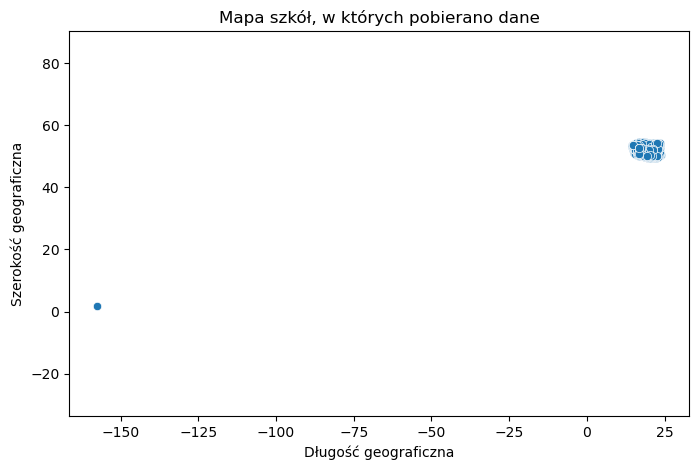

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(8,5), facecolor = "white")

sns.scatterplot(data = df, x = "Longitude", y = "Latitude", ax = ax)
ax.axis("equal")
ax.set_xlabel("Długość geograficzna")
ax.set_ylabel("Szerokość geograficzna")

ax.set_title("Mapa szkół, w których pobierano dane")

Można dostrzec jedną wartość odstającą od reszty. Sprawdzenie, co ona oznacza:

In [13]:
df[df['Longitude'] < 0]

,Name,Street,Post Code,City,Longitude,Latitude,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
Timestamp,,,,,,,,,,,
2025-04-28 11:21:09,Test Szkoła,ul Testowa,00-000,Testcity,-157.529698,1.858685,89.69,992.47,7.76,50.17,30.32


Jest to wartość testowa, nierzeczywista. Zatem należy ją usunąć ze zbioru, aby móc zobaczyć rzeczywiste dane dotyczące faktycznych pomiarów.

In [149]:
df = df[~(df['Longitude'] < 0)]

Ponowna wizualizacja po usunięciu wartości odstającej:

Text(0.5, 1.0, 'Mapa szkół, w których pobierano dane')

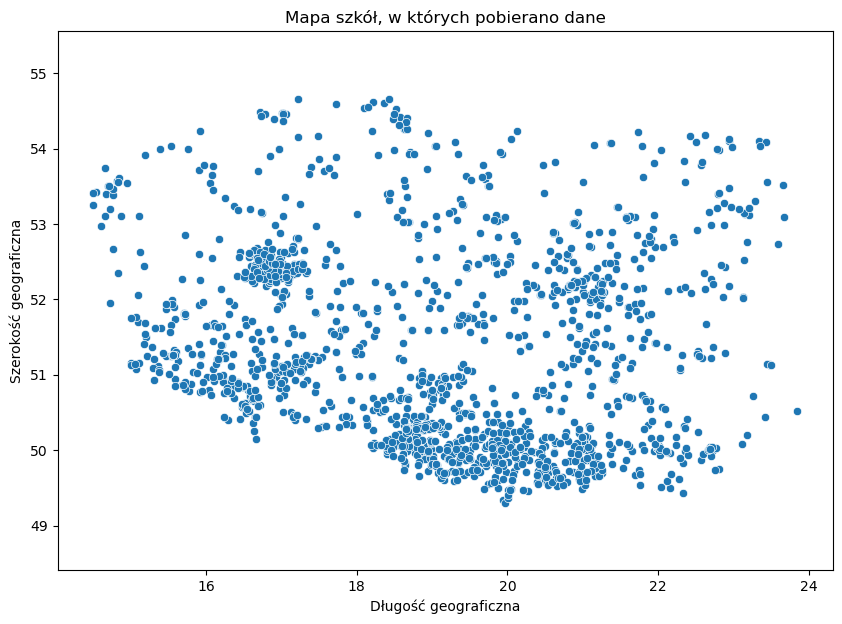

In [150]:
fig, ax = plt.subplots(1, 1, figsize = (10,7), facecolor = "white")

sns.scatterplot(data = df, x = "Longitude", y = "Latitude", ax = ax)
ax.axis("equal")
ax.set_xlabel("Długość geograficzna")
ax.set_ylabel("Szerokość geograficzna")

ax.set_title("Mapa szkół, w których pobierano dane")

Lista miast i ilość szkół w danym mieście, z których pobierane są pomiary:

In [16]:
df['City'].value_counts()

City
Poznań         81
Rybnik         18
Zabrze         17
Gliwice        16
Częstochowa    12
               ..
Filipów         1
Białuń          1
Koluszki        1
Komarowo        1
Kotlin          1
Name: count, Length: 1202, dtype: int64

### Statystyki opisowe zmiennych numerycznych:

W dalszej części uwaga zostanie poświęcona wyłącznie analizie zmiennych numerycznych.

In [152]:
df2 = df.drop(["Name",'City', "Street","Post Code"], axis = 1)
df2.dropna(inplace = True)
df2.head()

,Longitude,Latitude,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
Timestamp,,,,,,,
2025-04-28 11:21:09,18.224030,51.515630,95.120000,1015.110000,8.610000,32.860,20.200000
2025-04-28 11:21:09,19.942820,49.961030,34.200000,988.925000,18.775000,6.175,5.525000
2025-04-28 11:21:09,18.314889,50.503431,60.000000,1043.166667,12.266667,1.000,0.490000
2025-04-28 11:21:09,18.945706,49.965883,79.666667,1005.566667,11.166667,10.800,6.586667
2025-04-28 11:21:09,17.788907,51.596172,57.166667,1012.300000,14.400000,15.700,8.893333


Dla wstępnej analizy można wyświetlić tabelę zawierającą podstawowe statystyki opisowe:

In [153]:
df2.iloc[:,2:].describe()

,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
count,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000
mean,45.892248,1003.547592,14.511042,9.540906,7.893529
std,14.905450,14.198035,3.256907,10.575737,8.351864
min,0.000000,941.675000,-40.000000,0.000000,0.000000
25%,35.947917,994.739583,12.508050,5.272917,4.566667
50%,42.864800,1005.045833,13.868333,7.430952,6.416667
75%,51.783333,1014.920417,16.495833,11.037500,9.300000
max,100.000000,1097.800000,31.800000,245.666667,241.000000


Już na tym etapie można zauważyć kilka nietypowych wartości: temperatura minimalna -40, wilgotność - 0 i 100, czy wartości stężenia PM10 i PM2.5 powyżej 240.

Pomocne jest również przedstawienie danych na wykresach pudełkowych, które m.in. wskażą wartości odstające:

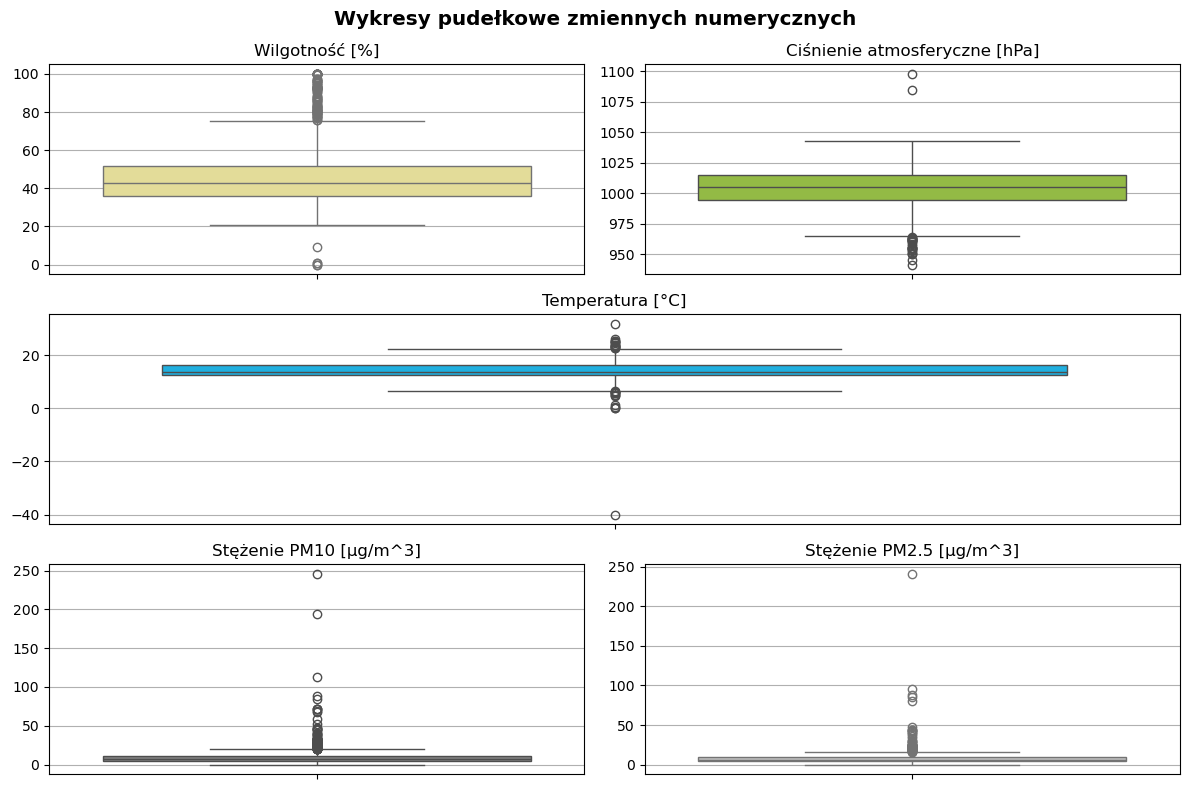

In [154]:
cols = ['Humidity Avg', 'Pressure Avg', 'Temperature Avg', 'PM10 Avg', 'PM25 Avg']
titles = ['Wilgotność', "Ciśnienie atmosferyczne", "Temperatura", "Stężenie PM10", "Stężenie PM2.5"]
units = ['%', 'hPa', '°C', "μg/m^3", "μg/m^3"]

fig, axes = plt.subplot_mosaic([["Hum", "Pres"],
                    ['Temp', 'Temp'],
                    ['PM10', 'PM25']
                   ], figsize = (12,8), facecolor = "white")

ax_names = ['Hum', "Pres", "Temp", "PM10", "PM25"]

fig.suptitle("Wykresy pudełkowe zmiennych numerycznych", fontsize = "x-large", fontweight = "bold")

colors = ['khaki', 'yellowgreen', 'deepskyblue', 'grey', 'silver']

for col, ax_name, title, unit, color in zip(cols, ax_names, titles, units, colors):
    sns.boxplot(df[col], ax = axes[ax_name], color = color)
    axes[ax_name].set_title(f"{title} [{unit}]")
    axes[ax_name].yaxis.label.set_visible(False)
    axes[ax_name].grid(visible = True, axis = 'y')
plt.tight_layout()

Na powyższym wykresie możemy zauważyć wartości odstające dla danych zmiennych. Niektóre są ewidentnymi błędami i są mało realne (np. temperatura -40, wilgotność 0 lub ciśnienie 1100).
Pozostałe (np. PM10 do wartości 150) są jednak realne i nie ma podstaw, aby uważać je za błędne. Nie należy ich zatem odrzucać z danych, ponieważ też niosą potencjalnie ważną informację.

Z danych odrzucone zostały następujące wartości odstające (na podstawie własnej analizy danych pogodowych i ustaleniu przybliżonych zakresów wartości typowych):
- wilgotność powyżej 90% i poniżej 7%
- ciśnienie atmosferyczne powyżej 1050 hPa i poniżej 960 hPa
- temperatura poniżej 5 st. Celsjusza i powyżej 26
- stężenie PM10 powyżej 100 $\frac{\mu g}{m^3}$
- stężenie PM2.5 powyżej 79 $\frac{\mu g}{m^3}$

In [64]:
prev = len(df2)
df2 = df2[(df2['Humidity Avg'] >= 7) & (df2['Humidity Avg'] <= 90) &
          (df2['Pressure Avg'] <= 1050) & (df2['Pressure Avg'] >= 960) &
          (df2['Temperature Avg'] >= 5) & (df2['Temperature Avg'] <= 26) &
          (df2['PM10 Avg'] <= 100) & (df2['PM25 Avg'] < 79)]

print(f"Usunięto {prev - len(df2)} rekordów")

Usunięto 0 rekordów


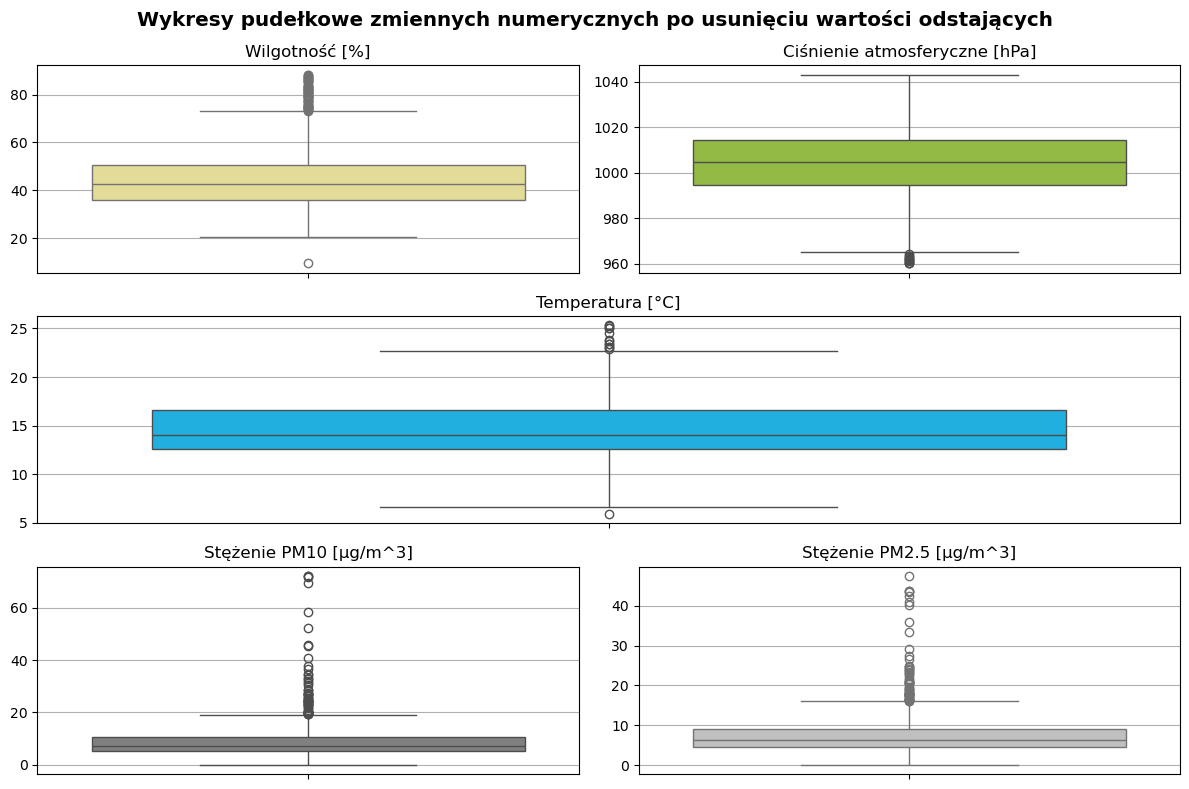

In [98]:
fig, axes = plt.subplot_mosaic([["Hum", "Pres"],
                    ['Temp', 'Temp'],
                    ['PM10', 'PM25']
                   ], figsize = (12,8), facecolor = "white")

fig.suptitle("Wykresy pudełkowe zmiennych numerycznych po usunięciu wartości odstających", fontsize = "x-large", fontweight = "bold")

colors = ['khaki', 'yellowgreen', 'deepskyblue', 'grey', 'silver']

for col, ax_name, title, unit, color in zip(cols, ax_names, titles, units, colors):
    sns.boxplot(df2[col], ax = axes[ax_name], color = color)
    axes[ax_name].set_title(f"{title} [{unit}]")
    axes[ax_name].yaxis.label.set_visible(False)
    axes[ax_name].grid(visible = True, axis = 'y')
plt.tight_layout()

Dane przedstawić można również za pomocą histogramu, aby zbadać ich rozkład.
Do histogramu dodane zostały też jądrowe estymatory gęstości, które pozwolą łatwiej ocenić kształt rozkładu.
Histogram został narysowany w wersji znormalizowanej (tak, że suma pół poszczególnych słupków sumuje się do 1), aby przybliżać funkcję gęstości prawdopodobieństwa.

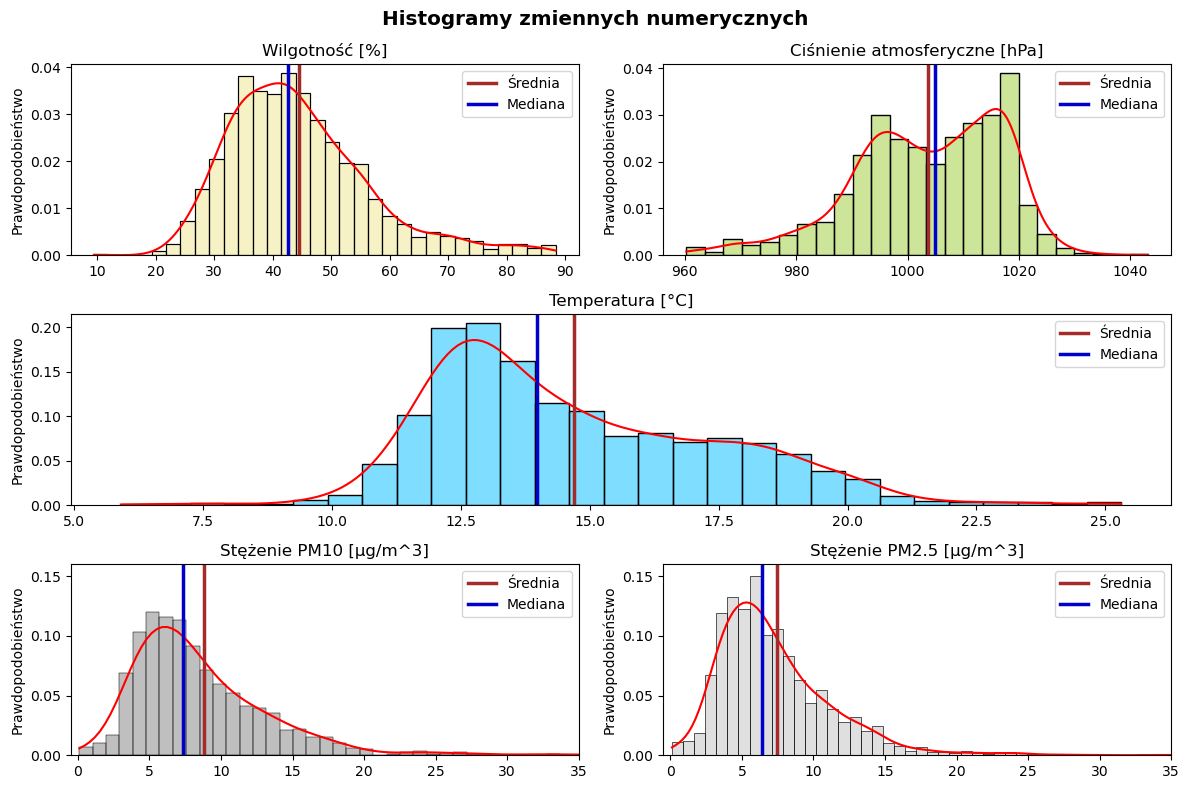

In [109]:
fig, axes = plt.subplot_mosaic([["Hum", "Pres"],
                    ['Temp', 'Temp'],
                    ['PM10', 'PM25']
                   ], figsize = (12,8), facecolor = "white")

lines = [mpl.lines.Line2D([], [], color = 'brown', lw = 2.5), mpl.lines.Line2D([], [], color = 'mediumblue', lw = 2.5)]

fig.suptitle("Histogramy zmiennych numerycznych", fontsize = "x-large", fontweight = "bold")

for col, ax_name, title, unit, color in zip(cols, ax_names, titles, units, colors):
    sns.histplot(df2[col], ax = axes[ax_name], bins = 'fd',  color = color, stat = "density", kde = True)
    mean = df2[col].mean()
    median = np.median(df2[col])
    axes[ax_name].lines[0].set_color("red")
    axes[ax_name].axvline(x = mean, color = "brown", linewidth = 2.5)
    axes[ax_name].axvline(x = median, color = "mediumblue", linewidth = 2.5)
    axes[ax_name].set_title(f"{title} [{unit}]")
    axes[ax_name].set_ylabel("Prawdopodobieństwo")
    axes[ax_name].xaxis.label.set_visible(False)
    
    if ax_name == 'PM10' or ax_name == 'PM25':
        axes[ax_name].set_xlim(-0.5, 35)
        axes[ax_name].set_ylim(0, 0.16)
        
    axes[ax_name].legend(lines, ['Średnia', 'Mediana'])
    
plt.tight_layout()

Możemy zauważyc, że rozkłady zmiennych są lewoskośne i jednomodalne.
Wyjątkiem jest ciśnienie atmosferyczne, gdzie możemy dostrzeć bimodalność (w okolicach 995 hPa i 1115 hPa). 

Ponownie, po przeczyszczeniu danych, można zbadać statystyki opisowe:

In [101]:
df2.describe()

,Longitude,Latitude,Humidity Avg,Pressure Avg,Temperature Avg,PM10 Avg,PM25 Avg
count,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000
mean,19.025065,51.325593,44.463502,1003.638621,14.684918,8.815720,7.441310
std,2.074102,1.266564,12.110423,13.197553,2.767748,6.114789,4.626501
min,14.499552,49.302185,9.433333,960.266667,5.900000,0.100000,0.100000
25%,17.020370,50.148930,35.741667,994.741667,12.600000,5.250000,4.550000
50%,19.058384,51.112277,42.533333,1004.900000,13.983333,7.375000,6.375000
75%,20.691327,52.385050,50.650000,1014.691667,16.616667,10.800000,9.150000
max,23.844610,54.652400,88.340000,1043.166667,25.308571,71.980000,47.450000


Parametry te co do zasady nie uległy znacznej zmianie. Usunięcie wartości skrajnie odstających więc nie zmieniło kształtów rozkładów.

## Związki między zmiennymi

Poniżej przedstawiono również kilka wykresów punktowych, w których przedstawiono związki między niektórymi ze zmiennych.

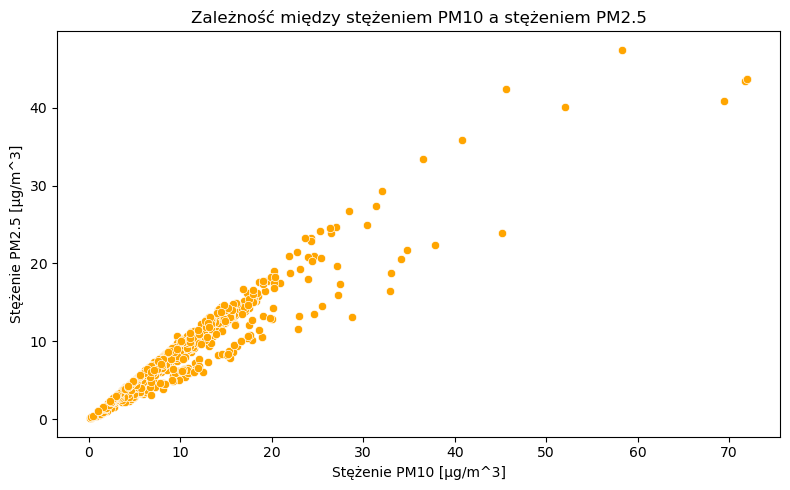

In [127]:
# zależność między PM2.5 i PM10

fig, ax = plt.subplots(1, 1, figsize = (8,5), facecolor = 'white')

sns.scatterplot(data = df2, x = 'PM10 Avg', y = 'PM25 Avg', ax = ax, color = "orange")
ax.set_title("Zależność między stężeniem PM10 a stężeniem PM2.5")
ax.set_xlabel("Stężenie PM10 [μg/m^3]")
ax.set_ylabel("Stężenie PM2.5 [μg/m^3]")


plt.tight_layout()

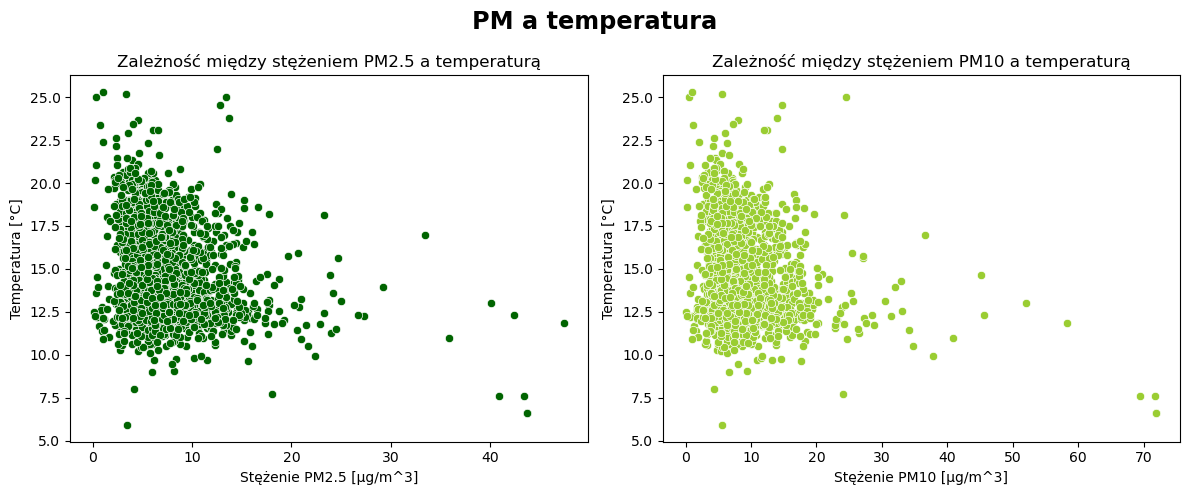

In [134]:
fig, ax = plt.subplots(1, 2, figsize = (12,5), facecolor = 'white')

fig.suptitle("PM a temperatura", fontsize = "xx-large", fontweight = "bold")

sns.scatterplot(data = df2, x = 'PM25 Avg', y = "Temperature Avg", ax = ax[0], color = "darkgreen")
ax[0].set_title("Zależność między stężeniem PM2.5 a temperaturą")
ax[0].set_xlabel("Stężenie PM2.5 [μg/m^3]")
ax[0].set_ylabel("Temperatura [°C]")

sns.scatterplot(data = df2, x = 'PM10 Avg', y = "Temperature Avg", ax = ax[1], color = "yellowgreen")
ax[1].set_title("Zależność między stężeniem PM10 a temperaturą")
ax[1].set_xlabel("Stężenie PM10 [μg/m^3]")
ax[1].set_ylabel('Temperatura [°C]')

plt.tight_layout()

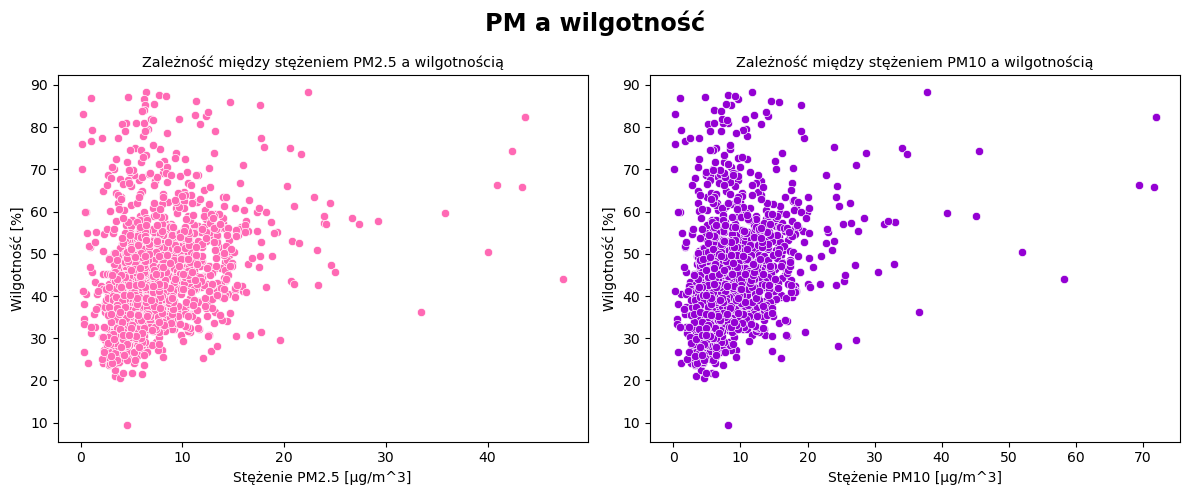

In [133]:
# Wilgotność a temperatura, pm2.5 i pm10

fig, ax = plt.subplots(1, 2, figsize = (12, 5), facecolor = 'white')

fig.suptitle("PM a wilgotność", fontsize = "xx-large", fontweight = "bold")

sns.scatterplot(data = df2, x = 'PM25 Avg', y = 'Humidity Avg', ax = ax[0], color = "hotpink")
ax[0].set_title("Zależność między stężeniem PM2.5 a wilgotnością", fontsize = 10.3)
ax[0].set_xlabel("Stężenie PM2.5 [μg/m^3]")
ax[0].set_ylabel("Wilgotność [%]")

sns.scatterplot(data = df2, x = 'PM10 Avg', y = "Humidity Avg", ax = ax[1], color = "darkviolet")
ax[1].set_title("Zależność między stężeniem PM10 a wilgotnością", fontsize = 10.3)
ax[1].set_xlabel("Stężenie PM10 [μg/m^3]")
ax[1].set_ylabel("Wilgotność [%]")


plt.tight_layout()

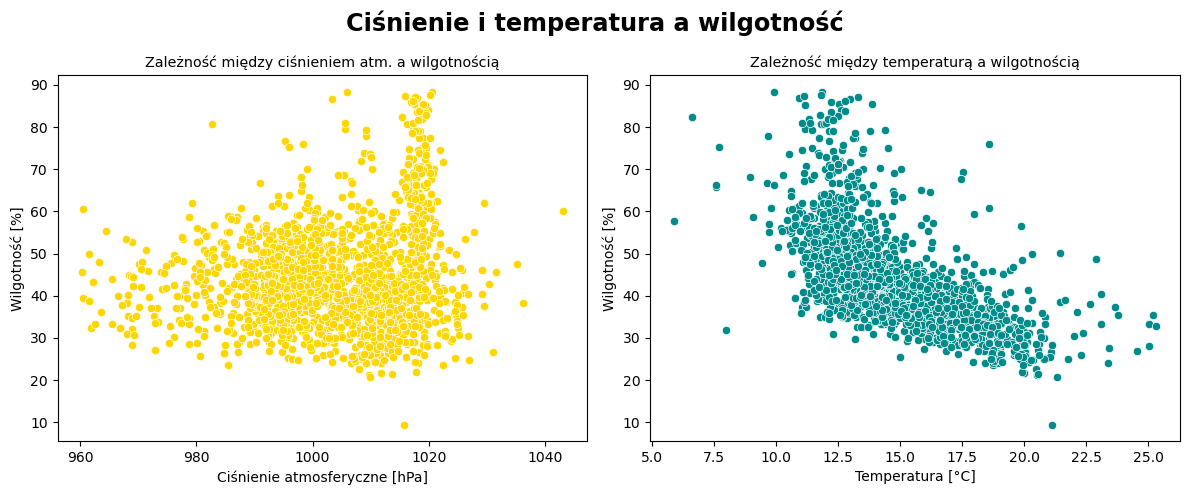

In [130]:
# ciśnienie a humidity a temperatura

fig, ax = plt.subplots(1, 2, figsize = (12, 5), facecolor = 'white')

fig.suptitle("Ciśnienie i temperatura a wilgotność", fontsize = "xx-large", fontweight = "bold")

sns.scatterplot(data = df2, x = 'Pressure Avg', y = 'Humidity Avg', ax = ax[0], color = "gold")
ax[0].set_title("Zależność między ciśnieniem atm. a wilgotnością", fontsize = 10.3)
ax[0].set_xlabel("Ciśnienie atmosferyczne [hPa]")
ax[0].set_ylabel("Wilgotność [%]")

sns.scatterplot(data = df2, x = 'Temperature Avg', y = "Humidity Avg", ax = ax[1], color = "darkcyan")
ax[1].set_title("Zależność między temperaturą a wilgotnością", fontsize = 10.3)
ax[1].set_xlabel("Temperatura [°C]")
ax[1].set_ylabel('Wilgotność [%]')

plt.tight_layout()


Na początku była badana kardynalność zmiennych nominalnych (City, Street itd.)
Wartości te były wysokie. Nie są one jednak istotne w zadaniu tworzeniu modelu, więc nie będą kodowane i uwzględniane.

Dane można wykorzystać do wymodelowania wartości wilgotności powietrza (parametru pomagającego przewidzieć opady).
Do tego celu można uzyć zmiennych:
- Ciśnienie atmosferyczne
- Temperatura
- Stężenie PM10

Pominięte zostało stężenie PM2.5, ponieważ jest ono zawarte w PM10, a więc dodanie tej zmiennej do modelu byłoby niepotrzebnym duplikowaniem informacji.
Nieuwzględnione zostały również długość i szerokość geograficzna. W wypadku tego modelu wilgotność może zostać wymodelowana za pomocą zmiennych dotyczących środowiska i jego zanieczyszczenia, a nie położenia geograficznego.

Współrzędne mogłyby zostać uwzględnione w przypadku analizy przestrzennej i dążenia do zbadania relacji między danymi wartościami w zależności od ich położenia.